#### A model of the summer camp game James and Sam are making

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [ ]:
### Make a class for the nodes
class node():
    def __init__(self, name, color, campers, hazard, connected, injury=1):
        self.name = name # string
        self.connected = connected # list of strings
        self.color = color # string
        self.campers = campers # integer
        self.hazard = hazard # boolean
        self.injury = injury # number of campers this hazard injures
        self.checked = False # has this node been checked
        self.injured = 0 # number of campers injured here cumulative
    
    def info(self):
        print(self.name)
        print('connected to', self.connected)
        print(self.color)
        print(self.campers, 'campers')
        print('hazard', self.hazard)
        print('injury', self.injury)
        print('')
        
    def activate(self, nodes):
        injured_campers = 0 
        self.checked = True
        if total_campers(nodes) == 0:
            return injured_campers
        # check the active hazard for campers
        if self.campers > 0:
            self.campers += -self.injury
            injured_campers = self.injury
            self.injured += self.injury
        
        # if there are no campers on the hazard, check the neighboring hazards
        else:
            # assume at first that you find no campers
            campers_found = False
            for other_name in self.connected:
                other = nodes[other_name]
                # for each connected node
                if other.campers > 0 and other.hazard == False: 
                    # if that node has campers on it and is not a hazard itself
                    self.campers += other.campers # move those campers here
                    other.campers = 0 # remove those campers from there
                    # This moves all the campers on connected nodes
                    # Mark that you found campers on a connected node
                    campers_found = True
                
            # if there are no campers on any adjecent nodes, check all nodes adjecent to those nodes
            if campers_found == False:
                for other_name in self.connected:
                    other = nodes[other_name]
                    if other.checked == False:
                        injured_campers += other.activate(nodes)
        return injured_campers    
                    
### draw a card and decide where it goes
def draw(deck):
    card = deck[-1]
    deck = deck[:-1]
    return card, deck

def reshuffle(location):
    deck = location.copy()
    np.random.shuffle(deck)
    location = []
    return deck, location

def discard(card, location):
    return location.append(card)  

def plot_all(r,nodes):
    plt.figure(figsize=(10,6))
    for n in nodes:
        plt.plot(range(r), nodes[n].campers, label=nodes[n].name)
        
def total_campers(nodes):
    campers = 0
    for n in nodes:
        campers += nodes[n].campers
    return campers
        

In [ ]:
### establish nodes

## evenly distributed map
nodes = {}
# nodes['mountains'] = node('mountains', 'green', 0, False, ['rapids', 'dining_hall', 'shallows', 'crafts_closet'])
# nodes['crafts_closet'] = node('crafts_closet', 'yellow', 0, False, ['mountains', 'ropes_course'])
# nodes['ropes_course'] = node('ropes_course', 'green', 0, False, ['crafts_closet', 'shallows', 'ampitheatre'])
# nodes['ampitheatre'] = node('ampitheatre', 'yellow', 0, False, ['ropes_course', 'shallows','boat_shed'])
# nodes['boat_shed'] = node('boat_shed', 'blue', 0, False, ['ampitheatre', 'campground'])
# nodes['campground'] = node('campground', 'green', 0, False, ['shallows', 'dining_hall','boat_shed','beach'])
# nodes['shallows'] = node('shallows', 'blue', 0, False, ['mountains','ropes_course','ampitheatre','campground','dining_hall'])
# nodes['beach'] = node('beach', 'blue', 0, False, ['campground', 'office','dining_hall','field'])
# nodes['dining_hall'] = node('dining_hall', 'yellow', 0, False, ['shallows','mountains','campground','beach','field','rapids'])
# nodes['rapids'] = node('rapids', 'blue', 0, False, ['mountains','dining_hall','field','main_lodge'])
# nodes['office'] = node('office', 'yellow', 0, False, ['beach','field','river_mouth','deep'])
# nodes['field'] = node('field', 'green', 0, False, ['dining_hall','beach','rapids','main_lodge','river_mouth','office'])
# nodes['main_lodge'] = node('main_lodge', 'yellow', 0, False, ['rapids','field','river_mouth','adventure_cabin'])
# nodes['adventure_cabin'] = node('adventure_cabin', 'green', 0, False, ['main_lodge','wood_shop'])
# nodes['wood_shop'] = node('wood_shop', 'yellow', 0, False, ['river_mouth','adventure_cabin','trail_zone'])
# nodes['river_mouth'] = node('river_mouth', 'blue', 0, False, ['main_lodge','office','field','wood_shop','trail_zone'])
# nodes['trail_zone'] = node('trail_zone', 'green', 0, False, ['wood_shop','river_mouth','deep'])
# nodes['deep'] = node('deep', 'blue', 0, False, ['office','trail_zone'])

## Clumped map
nodes = {}

nodes['main_lodge'] = node('main_lodge', 'yellow', 0, False, ['mountains','wood_shop','crafts_closet'])
nodes['crafts_closet'] = node('crafts_closet', 'yellow', 0, False, ['main_lodge','ampitheatre'])
nodes['wood_shop'] = node('wood_shop', 'yellow', 0, False, ['main_lodge','office','dining_hall'])
nodes['office'] = node('office', 'yellow', 0, False, ['wood_shop','campground','dining_hall','rapids'])
nodes['dining_hall'] = node('dining_hall', 'yellow', 0, False, ['office','ampitheatre','wood_shop'])
nodes['ampitheatre'] = node('ampitheatre', 'yellow', 0, False, ['dining_hall','crafts_closet','beach'])

nodes['beach'] = node('beach', 'blue', 0, False, ['boat_shed','shallows','ampitheatre'])
nodes['shallows'] = node('shallows', 'blue', 0, False, ['rapids','deep','beach'])
nodes['boat_shed'] = node('boat_shed', 'blue', 0, False, ['beach','river_mouth'])
nodes['river_mouth'] = node('river_mouth', 'blue', 0, False, ['deep','boat_shed','field'])
nodes['rapids'] = node('rapids', 'blue', 0, False, ['deep','shallows','office','campground'])
nodes['deep'] = node('deep', 'blue', 0, False, ['office','trail_zone'])

nodes['field'] = node('field', 'green', 0, False, ['river_mouth','ropes_course','adventure_cabin'])
nodes['ropes_course'] = node('ropes_course', 'green', 0, False, ['field','trail_zone','campground'])
nodes['campground'] = node('campground', 'green', 0, False, ['ropes_course','rapids','office','trail_zone'])
nodes['trail_zone'] = node('trail_zone', 'green', 0, False, ['campground','ropes_course','mountains'])
nodes['adventure_cabin'] = node('adventure_cabin', 'green', 0, False, ['field','mountains'])
nodes['mountains'] = node('mountains', 'green', 0, False, ['main_lodge','trail_zone','adventure_cabin'])


# nodes['one'] = node('one', 'yellow', 0, False, ['two'])
# nodes['two'] = node('two', 'green', 0, False, ['one', 'three'])
# nodes['three'] = node('three', 'blue', 0, False, ['two', 'four'])
# nodes['four'] = node('four', 'blue', 0, False, ['three'])







In [ ]:
### create hazard deck
full_hazard_deck = []
for name in nodes:
    full_hazard_deck += [name]*3
full_hazard_deck = np.array(full_hazard_deck)
hazard_deck = full_hazard_deck.copy()

### shuffle the deck
np.random.shuffle(hazard_deck)

print(hazard_deck)

### create the active hazard list 
active_hazards = []

### create a discard list
discard_hazards = []

### number of campers at the nurse's
nurse_campers = 0

### Place campers
n_campers = [4,3,2,1,1]
for i in n_campers: 
    card, hazard_deck = draw(hazard_deck)
    nodes[card].campers += i
    discard_hazards.append(card)

### Print out info on each node
for n in nodes:
    nodes[n].info()
   

In [ ]:
N = 20
camper_log = np.zeros((N, len(nodes)))
injury_log = np.zeros((N, len(nodes)))
for r in range(N):
    if total_campers(nodes) == 0: 
        print('no campers left on turn', r)
        break
    ## Mark that all nodes haven't been checked
    for n in nodes:
        nodes[n].checked = False
    ## draw a card from the hazard deck
    #shuffle the discard in first if the deck is empty
    if len(hazard_deck) < 1:
        hazard_deck, discard_hazards = reshuffle(discard_hazards)
    card, hazard_deck = draw(hazard_deck)
#     print(card, active_hazards, discard_hazards)
#     print('')

    ### activate hazards 
    # check for a surge
    do_surge=False
    if True in [nodes[card].name == nodes[haz].name for haz in active_hazards] or len(active_hazards) > 5:
        do_surge = True
    # check to see if each hazard on the active hazard list is activated
    for haz in active_hazards:
        # activate hazards that are the same color as the card
        if nodes[card].color == nodes[haz].color:
            nurse_campers += nodes[card].activate(nodes)# this goes in order from oldest to youngest hazards
            if do_surge: # do it again if do_surge is True
                nurse_campers += nodes[card].activate(nodes) 
    # check the activated hazard for campers
#     print(nurse_campers, 'injured')
#     print('')

# place the card in either the discard or the active hazard line
    if len(active_hazards) < 5:
        # add it to the active hazards
        active_hazards.append(card)
        nodes[card].hazard = True
    else:
        discard_hazards.append(card)

    for i,n in enumerate(nodes):
#         nodes[n].info()
        camper_log[r, i] = nodes[n].campers
        injury_log[r, i] = nodes[n].injured
    camper_log[r, -1] = nurse_campers
#     print('')
    print(active_hazards)


In [ ]:
plotme = injury_log
labels = [n for n in nodes]+['injured']
plt.plot(plotme[:r,:])
plt.legend(labels[:])
plt.show()

In [147]:
#### Run multiple games and take stats

def run_game(n_turns):
    ### establish nodes
    nodes = {}

    nodes['main_lodge'] = node('main_lodge', 'yellow', 0, False, ['mountains','wood_shop','crafts_closet'])
    nodes['crafts_closet'] = node('crafts_closet', 'yellow', 0, False, ['main_lodge','ampitheatre'])
    nodes['wood_shop'] = node('wood_shop', 'yellow', 0, False, ['main_lodge','office','dining_hall'])
    nodes['office'] = node('office', 'yellow', 0, False, ['wood_shop','campground','dining_hall','rapids'])
    nodes['dining_hall'] = node('dining_hall', 'yellow', 0, False, ['office','ampitheatre','wood_shop'])
    nodes['ampitheatre'] = node('ampitheatre', 'yellow', 0, False, ['dining_hall','crafts_closet','beach'])

    nodes['beach'] = node('beach', 'blue', 0, False, ['boat_shed','shallows','ampitheatre'])
    nodes['shallows'] = node('shallows', 'blue', 0, False, ['rapids','deep','beach'])
    nodes['boat_shed'] = node('boat_shed', 'blue', 0, False, ['beach','river_mouth'])
    nodes['river_mouth'] = node('river_mouth', 'blue', 0, False, ['deep','boat_shed','field'])
    nodes['rapids'] = node('rapids', 'blue', 0, False, ['deep','shallows','office','campground'])
    nodes['deep'] = node('deep', 'blue', 0, False, ['office','trail_zone'])

    nodes['field'] = node('field', 'green', 0, False, ['river_mouth','ropes_course','adventure_cabin'])
    nodes['ropes_course'] = node('ropes_course', 'green', 0, False, ['field','trail_zone','campground'])
    nodes['campground'] = node('campground', 'green', 0, False, ['ropes_course','rapids','office','trail_zone'])
    nodes['trail_zone'] = node('trail_zone', 'green', 0, False, ['campground','ropes_course','mountains'])
    nodes['adventure_cabin'] = node('adventure_cabin', 'green', 0, False, ['field','mountains'])
    nodes['mountains'] = node('mountains', 'green', 0, False, ['main_lodge','trail_zone','adventure_cabin'])


    ### create hazard deck
    full_hazard_deck = []
    for name in nodes:
        full_hazard_deck += [name]*3
    full_hazard_deck = np.array(full_hazard_deck)
    hazard_deck = full_hazard_deck.copy()

    ### shuffle the deck
    np.random.shuffle(hazard_deck)

    ### create the active hazard list 
    active_hazards = []

    ### create a discard list
    discard_hazards = []

    ### number of campers at the nurse's
    nurse_campers = 0

    ### Place campers
    n_campers = [4,3,2,1,1]
    for i in n_campers: 
        card, hazard_deck = draw(hazard_deck)
        nodes[card].campers += i
        discard_hazards.append(card)
   
    N = n_turns  
    camper_log = xr.DataArray(np.zeros((N, len(nodes))), coords=[np.arange(N), [n for n in nodes]], dims=['turn', 'node'])
    injury_log = xr.DataArray(np.zeros((N, len(nodes))), coords=[np.arange(N), [n for n in nodes]], dims=['turn', 'node'])
    for r in range(N):
        if total_campers(nodes) == 0:
            break
        ## Mark that all nodes haven't been checked
        for n in nodes:
            nodes[n].checked = False
        ## draw a card from the hazard deck
        #shuffle the discard in first if the deck is empty
        if len(hazard_deck) < 1:
            hazard_deck, discard_hazards = reshuffle(discard_hazards)
        card, hazard_deck = draw(hazard_deck)

        ### activate hazards 
        # check for a surge
        do_surge=False
        if True in [nodes[card].name == nodes[haz].name for haz in active_hazards] or len(active_hazards) > 5:
            do_surge = True
        # check to see if each hazard on the active hazard list is activated
        for haz in active_hazards:
            # activate hazards that are the same color as the card
            if nodes[card].color == nodes[haz].color:
                nurse_campers += nodes[card].activate(nodes)# this goes in order from oldest to youngest hazards
                if do_surge: # do it again if do_surge is True
                    nurse_campers += nodes[card].activate(nodes) 

    # place the card in either the discard or the active hazard line
        if len(active_hazards) < 5:
            # add it to the active hazards
            active_hazards.append(card)
            nodes[card].hazard = True
        else:
            discard_hazards.append(card)

        for i,n in enumerate(nodes):
            camper_log[r, i] = nodes[n].campers
            injury_log[r, i] = nodes[n].injured
        camper_log[r, -1] = nurse_campers
    return(camper_log, injury_log, r, active_hazards)




In [164]:
n_games = 10000
N = 20
camper_log_log = []
injury_log_log = []
endgame_turn = []
active_hazard_log = []
for game in range(n_games):
    g = run_game(N)
    camper_log_log.append(g[0])
    injury_log_log.append(g[1])
    endgame_turn.append(g[2])
    active_hazard_log.append(g[3])


In [203]:
camper_log_log = xr.concat(camper_log_log, dim='game')
injury_log_log = xr.concat(injury_log_log, dim='game')


KeyboardInterrupt: 

No handles with labels found to put in legend.


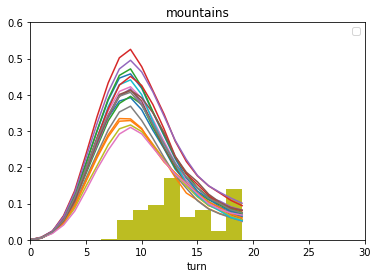

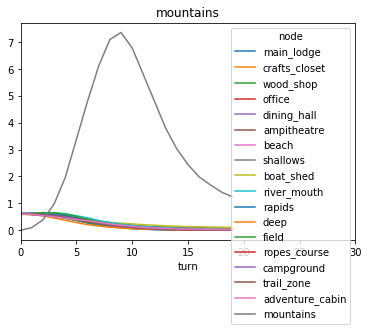

In [204]:

plt.figure()
injury_log_log.mean('game').plot.line(x='turn')
plt.title(n)
plt.ylim(0,0.6)
plt.xlim(0,30)
plt.hist(endgame_turn, density=True)
plt.legend()
plt.show()

plt.figure()
camper_log_log.mean('game').plot.line(x='turn')
plt.title(n)
# plt.ylim(0,0.6)
plt.xlim(0,30)
# plt.hist(endgame_turn, density=True)
plt.show()

### Notes: The 
Although the deep doesn't injure as many campers as most other hazards, it peaks in injured campers one whole turn earlier, at turn 9 (index 8) than all the other hazards, which peak at turn 10.

The office appears to be the single most dangerous hazard with the dining hall as second most dangerous, and that is hilarious.

The least dangerous hazards are the adventure cabin and the boat shed.


In [214]:
injury_log_log.to_netcdf('injury_log_log_clustered_map_N_10000_12_24_19.nc')
camper_log_log.to_netcdf('camper_log_log_clustered_map_N_10000_12_24_19.nc')
endgame_turn.to_netcdf('endgame_turn_clustered_map_N_10000_12_24_19.nc')

In [217]:
a = np.array(active_hazard_log)
a.shape

(10000, 5)

In [218]:
active_hazard_log = xr.DataArray(np.array(active_hazard_log),dims=['game','n_haz'])


In [220]:
active_hazard_log.to_netcdf('active_hazard_log_clustered_map_N_10000_12_24_19.nc')